The LU decomposition takes a time of : 0.05886251533846917


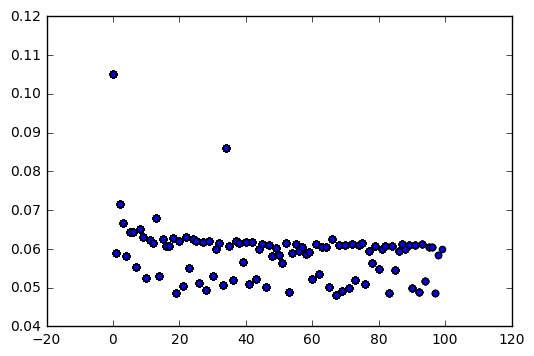

In [29]:
%matplotlib inline
import scipy.linalg
import numpy as np
import math
import time
import matplotlib.pyplot as plt
tim=[]
count=0
#function taken from http://stackoverflow.com/questions/5842903/block-tridiagonal-matrix-python
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)
def time_take():
    lim=4
    time_array = np.zeros(lim)
    n_array = np.zeros(lim)

    for i in range(1, lim):
        #start time
        n = 10 ** i
        n_array[i-1] = (np.log10(n))
        a = [-1] * (n-1)
        b = [2] * n
        c = [-1] * (n-1)
        tic = time.clock()
        A = tridiag(a, b, c)
        B=scipy.linalg.lu(A)
        toc=time.clock()
        delta_t=toc-tic
        if delta_t<.02:
            continue
        tim.append(delta_t)
        #end time

    #should take a min; plot still doesn't make sense
    plt.scatter(np.arange(len(tim)),tim)
    return B
for i in range(0,100):
    B=time_take()
print("The LU decomposition takes a time of :", sum(tim)/len(tim))


To make this matrix, we actually took some code from online to initialize the tridiagonal matrix [here](http://stackoverflow.com/questions/5842903/block-tridiagonal-matrix-python). Basically what the code does is it doesn't make a matrix, as a nxn matrix would take a massive amount of memory, so it creates 3 arrays, which correspond to the 3 diagonals that have non-zero numbers within the tridagonal matrix. Much of the code is actually to create the matrix, and there is a module in numpy which actually does the LU-decomposition, so we didn't have to hard code the process in. But to see how long this process takes, we used the time.clock function from the time module and took the difference in times between the end of initializing the matrix and completing the LU-decomposition process. Then we ran the code 100 times and made a scatter plot of the time this took. We took the average time and found that to make a 1000x1000 matrix, it took an average of about .06 s to complete the code.